In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

#1. 열 이름이 잘 인식되었는지
df = pd.read_csv("C:\\Users\\user\\2024_ai_test\\seeds\\seeds_dataset.txt", names=['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove', 'label', 'd' ,'f'], delimiter='\t')
df=df.drop(['d', 'f'], axis=1)
df

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


In [2]:
df.columns

Index(['area', 'perimeter', 'compactness', 'length of kernel',
       'width of kernel', 'asymmetry coefficient', 'length of kernel groove',
       'label'],
      dtype='object')

In [3]:
df['label'].value_counts()

label
2.000    68
1.000    66
3.000    65
5.000     1
2.270     1
4.607     1
5.439     1
5.088     1
5.163     1
4.745     1
Name: count, dtype: int64

In [4]:
df.isnull().sum()

area                       0
perimeter                  0
compactness                3
length of kernel           0
width of kernel            1
asymmetry coefficient      0
length of kernel groove    4
label                      4
dtype: int64

In [5]:
df=df.dropna(axis=0)
df.isnull().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
label                      0
dtype: int64

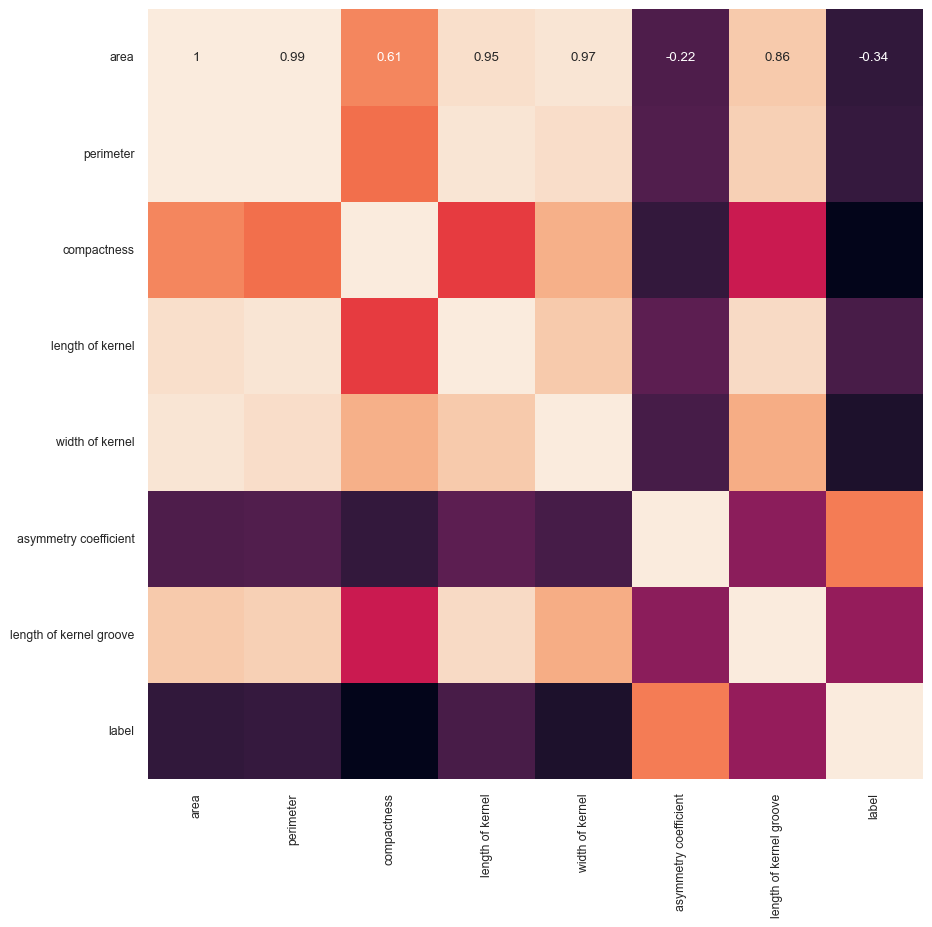

In [6]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

In [7]:
#레이블 분리
y=df['label']
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: label, dtype: float64

In [8]:
#데이터 분리
X=df.drop(['label'], axis=1)#x축 방향
X.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [9]:
#정규화
print(X.head())
scaler = StandardScaler()
scaled_values=scaler.fit(X).fit_transform(X)
X.iloc[:, :] = scaled_values
print(X.head())

    area  perimeter  compactness  length of kernel  width of kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   asymmetry coefficient  length of kernel groove  
0                  2.221                    5.220  
1                  1.018                    4.956  
2                  2.699                    4.825  
3                  2.259                    4.805  
4                  1.355                    5.175  
       area  perimeter  compactness  length of kernel  width of kernel  \
0  0.117164   0.186797     0.008144          0.270860         0.123135   
1 -0.013302  -0.019760     0.442341         -0.201481         0.178783   
2 -0.215868  -0.386972     1.469798    

In [10]:
#훈련 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(159, 7) (159,)
(40, 7) (40,)


In [15]:
#2. Dropout 있는버전
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping

inputs = Input(shape=(7,))
hidden1 = Dense(16, activation='relu')(inputs)
hidden2 = Dropout(0.25)(hidden1)
hidden3 = Dense(16, activation='relu')(hidden2)
hidden4 = Dropout(0.25)(hidden3)
hidden5 = Dense(16, activation='relu')(hidden4)
hidden6 = Dropout(0.25)(hidden5)
hidden7 = Dense(16, activation='relu')(hidden6)
output = Dense(1, activation='sigmoid')(hidden7)
model = Model(inputs=inputs, outputs=output)

early_stopping = EarlyStopping()
model.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['accuracy'])
model.summary()
history=model.fit(X_train, y_train
          , epochs=1000, batch_size=30
          , validation_split=0.2
          , callbacks=[early_stopping])

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.2363 - loss: 2.5421 - val_accuracy: 0.1562 - val_loss: 3.2364
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3820 - loss: 2.1641 - val_accuracy: 0.1562 - val_loss: 2.4886
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4042 - loss: 1.6292 - val_accuracy: 0.1562 - val_loss: 2.2142
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4135 - loss: 1.5080 - val_accuracy: 0.1562 - val_loss: 2.1704
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3769 - loss: 1.6225 - val_accuracy: 0.1562 - val_loss: 2.1669
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3459 - loss: 1.6409 - val_accuracy: 0.1562 - val_loss: 2.1667
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3649 - loss: 1.6773 - val_accuracy: 0.1562 - val_loss: 2.1667
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3950 - loss: 1.5563 - val_accuracy: 0.1562 - val_loss

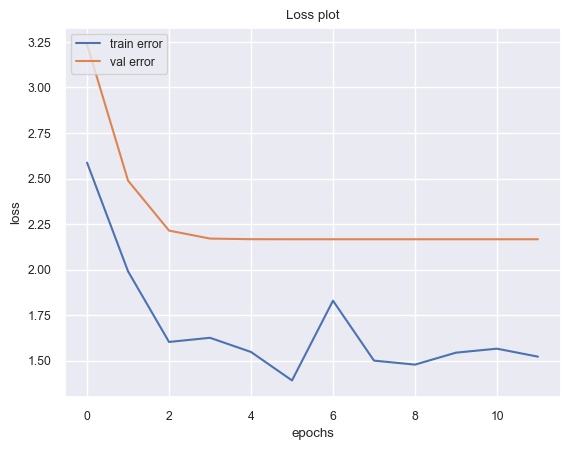

In [16]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
acc=history_dict['accuracy']
epochs=range(1, len(acc)+1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss plot")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()